# 데이터 처리 심화

### 주요 내용

1. 변수 수정, 추가 및 제거
2. 변수 형식 변환
3. 결측값 처리 및 파생변수 생성

<br>

### 목표 
1. 분석 목적에 맞게 변수를 수정하고 파생 변수를 추가할 수 있다.
2. 날짜 등 변수 형식을 활용할 수 있다.
3. 결측값을 적절한 값으로 대체하는 방법을 확인한다.


<br>
<hr>
<br>

<br>

## 1. 변수(열)의 수정, 추가, 제거

**pandas**의 기본 기능과 메서드를 활용하여 변수를 추가 하거나 수정, 업데이트하거나 제거 가능  
변수를 선택하듯 **=** 을 활용해서 변수를 추가하거나 업데이트 가능

### 1.1. 변수 수정 및 추가

In [ ]:
# 라이브러리 불러오기
import pandas as pd


# 예제 만들기 : 딕셔너리를 활용한 DataFrame 생성
df_own = pd.DataFrame(
                      {'FIRST' : ['A', 'B', 'C', 'D'],
                       'SECOND': [7,6,5,8], 
                       'THIRD' : pd.date_range('2023-01-01', periods=4, freq='W-SAT')}
                     )
df_own

In [ ]:
# 변수이름을 활용한 변수선택
df_own['SECOND']

In [ ]:
# =을 활용한 추가
df_own['FOURTH'] = 0
df_own

In [ ]:
# =을 활용한 업데이트
df_own['FOURTH'] = df_own['SECOND'] + 1
df_own

<br>

### 1.2. 객체 메서드와 Series 메서드의 비교

특히 날짜시간 변수의 경우 월, 일, 요일, 시간 등 다양한 요소를 추출해서 변수로 추가할 수 있음  
Python은 개발언어로 객체의 형식에 매우 엄격하므로 메서드의 구분 필요  
개별 날짜에 적용할 수 있는 메서드가 아닌 **pandas**의 **Series** 메서드 활용을 추천 

In [ ]:
# []와 for를 활용한 파생변수 생성
df_own.loc[0, 'THIRD'].weekday()
    ## 0~6: 월~일
    ## 5: 토
    
    ## 하나의 값에 대해서는 메서드 활용가능

In [ ]:
# Series에 대해서는 Series의 메서드만 활용 가능
df_own['THIRD'].weekday()

In [ ]:
df_own['THIRD'].apply(lambda x: x.weekday())
# df_own

<br>

pandas의 *dt.weekday*를 활용하면 훨씬 손쉽게 파생변수 생성 가능
 * 참고: [dt.weekday](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.weekday.html)

In [ ]:
# pandas의 dt.weekday 활용
df_own['THIRD'].dt.weekday

In [ ]:
df_own['WEEKDAY'] = df_own['THIRD'].dt.weekday

In [ ]:
df_own

<br>

### 1.3. 조건을 활용한 값 변경, 생성

조건을 활용해 일부 관측치를 선택하듯이, 조건을 설정하고 변수를 추가하거나 업데이트 가능

In [ ]:
# 조건을 활용한 일부 관측치 선택
df_own.loc[df_own['FIRST'].isin(['A','B'])]

In [ ]:
# 조건을 활용한 일부 관측치의 특정 변수 값 변경
df_own.loc[df_own['FIRST'].isin(['A','B']), 'FOURTH']

In [ ]:
df_own.loc[df_own['FIRST'].isin(['A','B']), 'FOURTH'] = 9999

In [ ]:
df_own

In [ ]:
# 일부 관측치만 값 생성
df_own.loc[df_own['FIRST'].isin(['A','B']), 'OPTIONAL'] = 1
df_own
    ## NaN := 결측값(missing)

<br>

### 1.4. 변수 제거

*drop()* 은 관측치와 변수를 제거할 수 있는데 **index**와 **columns**를 활용  
`axis=`옵션에 따라 `axis=0`이면 관측치를 제거하거 `axis=1`이면 변수를 제거  

`columns=`이라는 옵션을 명시해서 변수를 제거하는 것이 가장 명확하고 실수를 줄일 수 있음

In [ ]:
# drop()을 활용한 관측치/변수 제거
df_own.drop('FOURTH', axis=1)
    # axis = 0 : 관측치
    # axis = 1 : 변수

In [ ]:
# drop()을 활용한 관측치/변수 제거(columns 활용)
df_own.drop(columns=['FOURTH'])

In [ ]:
# drop( ) 실행 후 원본 데이터는 변함이 없음
df_own

In [ ]:
# 원본 데이터의 업데이트
df_own = df_own.drop(columns=['FOURTH'])
df_own

<br>

### 1.5. 변수 이름 변경

변수이름을 바꾸고 싶을 때는 **DataFrame**의 메서드 *rename()* 을 활용  
이때 `columns=` 옵션을 활용하고 딕셔너리 형식으로 기존변수이름과 새변수이름을 콜론으로 연결

In [ ]:
# rename() 활용 변수 이름 바꾸기 
df_own.rename(columns = {'FIRST':'var1', 'SECOND':'var2'})

<br>

#### [실습] df_sp를 활용

1. 'math score', 'reading score', 'writing score'를 합한 변수 'total'을 **df_sp**에 추가
2. 1의 'total'이 270이상인 학생들만 'EX'라는 값을 갖는 'grade' 변수 추가
3. 'math score', 'reading score', 'writing score' 중 한과목이라도 40보다 작은지 확인하기
4. 3.의 결과를 활용해서 세 점수 중 하나라도 40점 미만은 학생은 'grade'를 'FAIL'로 수정하기
5. 변수 'grade'의 이름을 'class'로 바꾸기
6. 변수 'total'을 제거하기



In [ ]:
df_sp = pd.read_csv('data/StudentsPerformance.csv')
df_sp.head()

In [ ]:
df_sp['math score'].sum()

In [ ]:
df_sp.filter(regex='score').sum(axis=1)

In [ ]:
# 1. 답안
df_sp['total'] = df_sp['math score'] + df_sp['reading score'] + df_sp['writing score']
df_sp

In [ ]:
df_sp.loc[df_sp['total'] >= 270, 'grade'] = 'EX'
df_sp

In [ ]:
(df_sp.filter(regex='score') < 40).sum(axis=0)

In [ ]:
(df_sp.filter(regex='score') < 40).any(axis=1)

In [ ]:
# 3. 답안
cond_fail = (df_sp['math score']<40) | (df_sp['reading score']<40) | (df_sp['writing score']<40)
cond_fail

In [ ]:
df_sp.loc[cond_fail, 'grade'] = 'FAIL'

In [ ]:
df_sp.rename(columns={'grade':'class'})

In [ ]:
df_sp.drop(columns=['total'])

<br>
<hr>
<br>

## 2. 결측값 처리

결측값은 다양한 이유로 발생
- 애초에 값이 없는 경우
- 값이 있으나 사람 실수로 누락한 경우
- 센서, 통신망 등의 오류로 값이 들어오지 않은 경우

먼저 결측값 존재 여부 확인하고, 대체를 할 지 그대로 둘 지를 결정  
대체를 한다면 어떤 값으로 채울지도 고민하여 지정

In [ ]:
# 예제 데이터 불러오기
df_na = pd.read_csv('./data/data_dupna.csv')
df_na
    # NaN : 결측

<br>

> 아래의 명령어를 활용하면 전체 데이터에서 결측값이 있는 관측치나 변수를 확인할 수 있습니다. 


In [ ]:
# 하나라도 결측값이 있는 변수 확인
df_na.isnull().any(axis=1)

In [ ]:
# 하나라도 결측값이 있는 관측치 확인
df_na[df_na.isnull().any(axis=1)]

<br>

### 2.1. 결측값 포함 관측치 제거

결측값이 있는 관측치에 대응하는 가장 간단한 방법은 결측치를 포함한 변수나 관측치를 제거하는 것

In [ ]:
# 하나라도 결측값이 있는 관측치 제거
df_na.dropna()

In [ ]:
# 특정 변수 기준 결측값이 있는 관측치 제거
df_na.dropna(subset=['info1'])

<br>

### 2.2. 결측값 대체

일반적으로 결측값을 그대로 두거나 다음과 같이 결측값을 적절한 값으로 대체하고 활용

In [ ]:
# 모든 결측값을 일괄 대체
df_na.fillna(value=0)

In [ ]:
# 변수별 결측값 대체 지정
df_na.fillna(value={'info1':0, 'info2':'NA'})

In [ ]:
# 가장 앞쪽의 결측이 아닌 값으로 대체
    ## 센서 등의 값 누락에 활용
df_na.fillna(method='bfill')

In [ ]:
df_na

In [ ]:
# 이후 값중 결측이 아닌 값으로 대체
    ## groupby()를 활용하여 id 등 범위 내 대체
df_fill = df_na.groupby('id').fillna(method='bfill')
df_fill['id'] = df_na['id']
df_fill

In [ ]:
# 특정한 변수만 결측값 대체
    ## groupby()와 fillna()를 활용할 경우 그룹변수가 사라짐
    ## 특정 변수만 선택해서 결측값 대체하고 업데이트
df_na['info2'] = df_na.groupby('id')['info2'].fillna(method='ffill')    
df_na

<br>
<hr>
<br>

## 3. 변수 형식 변환 및 파생변수 생성

*read_csv()* 로 데이터를 불러오면 적당한 형식으로 지정되는데, 가끔 형식을 직접 바꿔야할 상황이 있음  
상황에 따라 날짜에서 요일을 추출하듯이 기존 변수를 활용해서 새로운 변수를 추가해서 분석에 활용해야하는 경우도 있음  

<br>

### 3.1. 변수 형식의 확인/변환
**DataFrame**에서는 다음과 같은 Series 형식을 활용

+ float: 실수(소수점을 포함한 숫자)
+ int: 정수(integer)
+ datetime: 날짜시간
+ bool: 불/불린(True 혹은 False)
+ category: 범주형
+ object: 문자형(string) 혹은 그 외

*.dtypes* 를 활용하면 변수 형식을 확인 가능  
*.astype()* 을 활용해서 변수 형식을 변환 가능



In [ ]:
# 데이터 불러오기
df_ins = pd.read_csv('data/insurance.csv')
df_ins.head()

In [ ]:
# 변수 형식 확인
df_ins.dtypes

In [ ]:
# children을 float으로 변환
df_ins['children'].astype('float')

In [ ]:
# children을 object로 변환
df_ins['children'].astype('object')

In [ ]:
# 기존 변수의 형식 업데이트
df_ins['children'] = df_ins['children'].astype('float')
df_ins.head()

In [ ]:
# 복수 변수의 형식 일괄 업데이트
category_vars = ['sex', 'smoker', 'region']
df_ins[category_vars] = df_ins[category_vars].astype('category')
df_ins.dtypes

In [ ]:
# select_dtypes()의 활용
df_ins.select_dtypes('category')

<br>

#### [실습] df_pr의 활용

1. Pulse2(뛴 후)와 Pulse1(뛰기 전)의 차이를 계산하고 'Diff'로 변수 추가하기
2. `df_pr.dtypes`로 형식 확인하고 `df_pr.nunique()`로 중복값 제거한 값 개수 확인하기
3. 범주형 형식이 적당한 변수 이름 목록 만들기
4. 3.의 변수들을 astype()으로 category 형식으로 변환하고 업데이트 하기
5. Ran, Smokes, Alcohol별 1.의 Diff의 평균 계산하기

In [ ]:
df_pr = pd.read_csv('data/PulseRates.csv')
df_pr.head(1)

In [ ]:
df_pr['Diff'] = df_pr['Pulse2'] - df_pr['Pulse1']
df_pr

In [ ]:
df_pr.dtypes

In [ ]:
df_pr.nunique()

In [ ]:
cat_vars = ['Gender', 'Smokes', 'Alcohol', 'Exercise', 'Ran']
df_pr[cat_vars] = df_pr[cat_vars].astype('category')
df_pr.dtypes

In [ ]:
df_pr.groupby(['Ran', 'Smokes', 'Alcohol'], as_index=False)['Diff'].mean()

<br>

### 3.2. 수치형 변수의 구간화

수치형 변수는 그대로 활용하기 보다는 구간화하는 경우가 많음  
*cut()* 이나 *qcut()* 함수를 주로 활용

+ *cut()*: 등간격 혹은 주어진 구간 경계로 구간화
+ *qcut()*: 등비율로 구간화

In [ ]:
(df_ins['age'] // 10).apply(lambda x: str(x)+'0대').astype('category')

In [ ]:
# 연령대 변수 생성
    ## //: 몫 계산
    ## %: 나머지 계산
df_ins['age_grp'] = (df_ins['age'] // 10).astype('category')
df_ins

In [ ]:
df_ins['age_grp'] = (df_ins['age'] // 10).apply(lambda x: str(x)+'0대')
df_ins

<br>

*cut()* 을 활용해서 등간격으로 구간화할 수 있고, `bins=` 옵션에 적절한 구간값을 직접 넣을 수도 있음

In [ ]:
# 등간격으로 구간화하기
pd.cut(df_ins['charges'], bins=10)

In [ ]:
charges_breaks = [0, 5000, 10000, 20000, 100000000]

In [ ]:
pd.cut(df_ins['charges'], bins=charges_breaks, right=False, labels=['1','2','3','4'])

In [ ]:
# cut()을 활용한 10등급화
df_ins['charges_grp'] = pd.cut(df_ins['charges'], bins=10, labels=range(10))
df_ins

In [ ]:
# 등구간의 관측치 불균형 문제
df_ins['charges_grp'].value_counts()

In [ ]:
# qcut()을 활용한 등비율 구간화
df_ins['charges_grp2'] = pd.qcut(df_ins['charges'], q=10, labels=range(1, 11))
df_ins

In [ ]:
df_ins['charges_grp2'].value_counts()

<br>

#### [실습] 데이터 df_sp 활용

1. cut()으로 'reading score'를 20점 단위로 5개 그룹 변수 추가 
2. cut()으로 'reading score'를 등간격(구간 길이가 동일)으로 5개 그룹 변수 추가
3. qcut()으로 'readiong score'를 등비율로 5 등급화
4. pivot_table()을 활용해서 'parental level of education'과 3.의 그룹 변수로 'math score'의 평균 계산

In [ ]:
df_sp.head()

In [ ]:
df_sp['r_grp'] = pd.cut(df_sp['reading score'], bins=[0,20,40,60,80,100], labels=[1,2,3,4,5])
df_sp['r_grp']

In [ ]:
pd.cut(df_sp['reading score'], bins=5)

In [ ]:
df_sp['r_grp'] = pd.qcut(df_sp['reading score'], q=5)
df_sp

In [ ]:
import seaborn as sns

pt = df_sp.pivot_table(values='math score', index='parental level of education', columns='r_grp', aggfunc='mean')
sns.heatmap(pt, cmap='YlGnBu', annot=True)

### 3.3. 그룹 내 순위, 이동, 누적 변수 생성

> 데이터 분석 과정에서 그룹별로 순위를 매기거나, 직전 값과 비교를 통해서 변화량 등을 확인하기도 합니다. 뿐만 아니라 이동 평균이나 누적 최댓값 등을 계산하기도 합니다.

In [ ]:
# 데이터 불러오기
df_dup = pd.read_csv('data/data_dupna.csv')
df_dup

In [ ]:
# 순위 생성(동점일 경우 평균 등수)
df_dup['amount'].rank(ascending=False)

In [ ]:
ValueError: first not supported for non-numeric data

In [ ]:
df_dup.dtypes

In [ ]:
# 순위 생성(동점일 경우 index 순)
df_dup['date'].rank(ascending=True, method='min')

In [ ]:
# 사용자별 순위 파생변수 추가
df_dup['seq'] = df_dup.groupby('id')['date'].rank(method='min',ascending=False)
df_dup

In [ ]:
# rank 활용 최종건 선택
df_dup[df_dup['seq']==1]

In [ ]:
# 데이터 정렬 및 날짜 형식 변환
df_dup = df_dup.sort_values(['id','date']).reset_index(drop=True)
df_dup['date'] = df_dup['date'].astype('datetime64[ns]')
df_dup

In [ ]:
df_dup['date'].shift()

In [ ]:
# 그룹별 이동 값 변수 추가
df_dup['date_prev'] = df_dup.groupby('id')['date'].shift()
df_dup

In [ ]:
# 시차의 계산
df_dup['date_diff'] = df_dup['date'] - df_dup['date_prev']
df_dup

In [ ]:
df_dup['amount'].cumsum()

In [ ]:
# 그룹별 누적합 계산
df_dup['cum_amount'] = df_dup.groupby('id')['amount'].cumsum()
df_dup

In [ ]:
df_dup.rolling(2)['amount'].mean()

In [ ]:
# rolling() 활용 그룹별 이동 평균 계산
df_dup['ma_amount'] = df_dup.groupby('id').rolling(2)['amount'].mean().reset_index(drop=True)
df_dup

In [ ]:
df_dup.groupby('id').rolling(2)['amount'].mean().index

## 4. 날짜시간 변수 활용

날짜시간 변수에서 요소를 추출할 수 있고, 날짜시간별로 집계된 데이터로 시각화 가능

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Windows
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

#macOS
# plt.rc('font', family='AppleGothic')
# plt.rc('axes', unicode_minus=False)

In [ ]:
df_subway = pd.read_csv('data/서울교통공사_역별일별승하차인원정보_20220731.csv')
df_subway

In [ ]:
# 형식 변환없이 집계 및 시각화
agg = df_subway.groupby(['날짜','호선'], as_index=False)['이용객수'].sum()

sns.lineplot(data=agg, 
              x='날짜',
              y='이용객수',
              hue='호선')

In [ ]:
df_subway.dtypes

In [ ]:
df_test = pd.DataFrame({'날짜':['2022년1월1일', '2022년1월5일']})
df_test['날짜'] = df_test['날짜'].str.replace('년','-')
df_test['날짜'] = df_test['날짜'].str.replace('월','-')
df_test['날짜'] = df_test['날짜'].str.replace('일','')
pd.to_datetime(df_test['날짜'])

In [ ]:
# to_datetime()을 활용한 형식 변환
df_subway['호선'] = df_subway['호선'].astype('category')
df_subway['날짜'] = pd.to_datetime(df_subway['날짜'])
df_subway

#20220101 01:11:11

In [ ]:
# 요일 변수 생성
df_subway['요일'] = df_subway['날짜'].dt.weekday
df_subway

In [ ]:
# 월 변수 생성
df_subway['월'] = df_subway['날짜'].dt.month
df_subway

In [ ]:
# 날짜별 집계값의 생성
agg = df_subway.groupby(['역명','호선'], as_index=False)['이용객수'].sum()
agg = agg[agg['이용객수'] != 0 ]
agg['역명'] = agg['역명'].astype('category')

In [ ]:
sns.scatterplot(data=agg, x='호선', y='이용객수', hue='역명')

In [ ]:
agg = df_subway.groupby(['날짜','호선'], as_index=False)['이용객수'].sum()

In [ ]:
# 시계열 데이터의 시각화 
sns.lineplot(data=agg, 
             x='날짜',
             y='이용객수',
             hue='호선')

#### [실습] df_accident를 활용하여 7, 8월 새벽 1~5시 사고 건수 계산

In [ ]:
df_accident = pd.read_csv('data/도로교통공단_사망 교통사고 정보_20211231_utf8.csv')
df_accident

In [39]:
df_accident["발생년월일시"] = pd.to_datetime(df_accident["발생년월일시"])
df_accident['월'] = df_accident["발생년월일시"].dt.month
df_accident['시'] = df_accident["발생년월일시"].dt.hour
df_accident

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도,월,시
0,2021,2021-01-01 03:00:00,야,금,1,3,0,3,0,경북,...,교차로,교차로부근,승용차,승용차,1097010.0,1793385.0,128.578152,36.132653,1,3
1,2021,2021-01-01 09:00:00,주,금,1,0,0,0,0,충남,...,단일로,기타단일로,승용차,없음,902369.0,1847109.0,126.408201,36.616845,1,9
2,2021,2021-01-01 15:00:00,주,금,1,0,0,0,0,강원,...,교차로,교차로내,원동기장치자전거,승용차,1123975.0,1974509.0,128.907484,37.761842,1,15
3,2021,2021-01-01 19:00:00,야,금,1,0,0,0,0,전남,...,단일로,기타단일로,화물차,보행자,886507.0,1613961.0,126.263573,34.513391,1,19
4,2021,2021-01-01 21:00:00,야,금,1,0,0,0,0,경기,...,단일로,기타단일로,승용차,보행자,953522.0,1915403.0,126.976011,37.236327,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,2021,2021-12-31 16:00:00,주,금,1,0,0,0,0,경북,...,교차로,교차로내,승용차,이륜차,1119020.0,1766895.0,128.818730,35.891434,12,16
2812,2021,2021-12-31 17:00:00,주,금,1,0,0,0,0,제주,...,단일로,기타단일로,화물차,화물차,940588.0,1503049.6,126.860248,33.517699,12,17
2813,2021,2021-12-31 18:00:00,야,금,1,0,0,0,0,강원,...,단일로,기타단일로,승용차,보행자,1023127.0,1982332.0,127.762845,37.840465,12,18
2814,2021,2021-12-31 19:00:00,야,금,1,0,0,0,0,경북,...,교차로,교차로횡단보도내,승용차,보행자,1058805.0,1824755.0,128.155943,36.418521,12,19


In [43]:
cond_month = df_accident['월'].between(7,8)
cond_hour = df_accident['시'].between(1,5)
df_accident[cond_month & cond_hour].shape[0]

74

In [49]:
pt = df_accident.pivot_table(values='사망자수', index='월', columns='시', aggfunc='sum')
pt.loc[7:8, 1:5].sum().sum()

78.0

<Axes: xlabel='시', ylabel='월'>

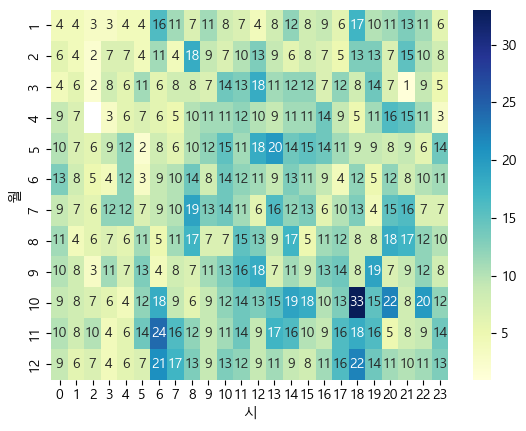

In [50]:
sns.heatmap(pt, cmap='YlGnBu', annot=True)

사망자수


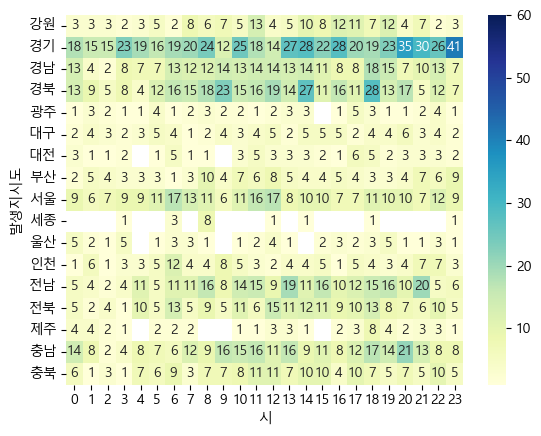

부상자수


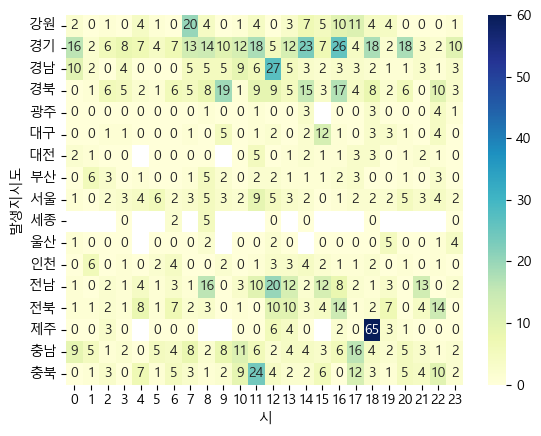

중상자수


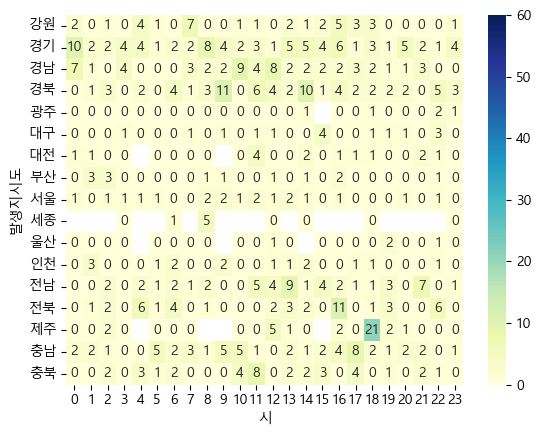

경상자수


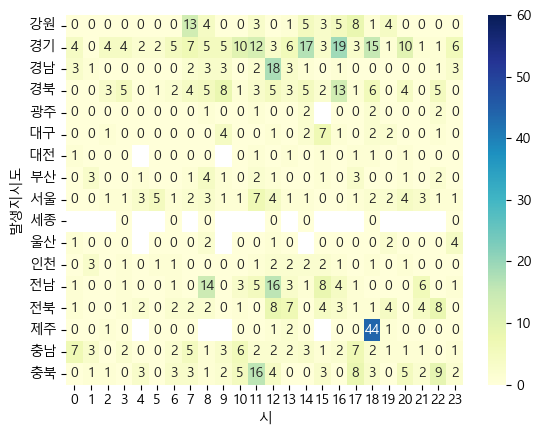

In [54]:
for col in ['사망자수', '부상자수', '중상자수', '경상자수']:
    print(col)
    pt = df_accident.pivot_table(values=col, index='발생지시도', columns='시', aggfunc='sum')
    sns.heatmap(pt, cmap='YlGnBu', annot=True, vmax=60)
    plt.show()

In [51]:
df_accident.columns

Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X(UTMK)',
       '발생위치Y(UTMK)', '경도', '위도', '월', '시'],
      dtype='object')

#### End of script